# **Data PreProcessing**

In [23]:
import pandas as pd 
import numpy as np 
df1=pd.read_csv('credits.csv')
df2=pd.read_csv('movies_metadata.csv')


/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [24]:
df1.dtypes

cast    object
crew    object
id       int64
dtype: object

In [25]:
df2.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [26]:
# merging two dataset 
df2["id"] = df1["id"].astype(str).astype(int)
df2= df2.merge(df1,on='id')

In [27]:
df2.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'cast', 'crew'],
      dtype='object')

In [28]:
# extracting year from release date
df2['year'] = pd.to_datetime(df2['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)
df2.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,year
0,FALSE,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",1995
1,FALSE,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",1995
2,FALSE,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",1995
3,FALSE,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",1995
4,FALSE,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",1995


In [29]:
# extracting genres
from ast import literal_eval
df2['new_genres'] = df2['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

df2.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,status,tagline,title,video,vote_average,vote_count,cast,crew,year,new_genres
0,FALSE,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",1995,"[Animation, Comedy, Family]"
1,FALSE,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",1995,"[Adventure, Fantasy, Family]"
2,FALSE,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",1995,"[Romance, Comedy]"
3,FALSE,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",1995,"[Comedy, Drama, Romance]"
4,FALSE,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",1995,[Comedy]


In [30]:
#dropping junk row
df2 = df2[df2.belongs_to_collection != '2.185485']

In [31]:
df2[df2['original_title'] != df2['title']][['title', 'original_title']].head()

,title,original_title
28,The City of Lost Children,La Cité des Enfants Perdus
29,Shanghai Triad,摇啊摇，摇到外婆桥
32,Wings of Courage,"Guillaumet, les ailes du courage"
57,The Postman,Il postino
58,The Confessional,Le confessionnal


In [32]:
df2.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,status,tagline,title,video,vote_average,vote_count,cast,crew,year,new_genres
0,FALSE,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",1995,"[Animation, Comedy, Family]"
1,FALSE,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",1995,"[Adventure, Fantasy, Family]"
2,FALSE,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",1995,"[Romance, Comedy]"
3,FALSE,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",1995,"[Comedy, Drama, Romance]"
4,FALSE,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",1995,[Comedy]


In [33]:
df2.drop(['adult', 'budget', 'homepage', 'poster_path', 'production_countries' , 'release_date', 'runtime', 'spoken_languages', 'status', 'video' ], axis=1)

,belongs_to_collection,genres,id,imdb_id,original_language,original_title,overview,popularity,production_companies,revenue,tagline,title,vote_average,vote_count,cast,crew,year,new_genres
0,"{'id': 10194, 'name': 'Toy Story Collection', ...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,"[{'name': 'Pixar Animation Studios', 'id': 3}]",373554033.0,NaN,Toy Story,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",1995,"[Animation, Comedy, Family]"
1,NaN,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",262797249.0,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",1995,"[Adventure, Fantasy, Family]"
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",0.0,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",1995,"[Romance, Comedy]"
3,NaN,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,[{'name': 'Twentieth Century Fox Film Corporat...,81452156.0,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",1995,"[Comedy, Drama, Romance]"
4,"{'id': 96871, 'name': 'Father of the Bride Col...","[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,"[{'name': 'Sandollar Productions', 'id': 5842}...",76578911.0,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",1995,[Comedy]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45551,NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",106807,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,[],0.0,Rising and falling between a man and woman,Subdue,4.0,1.0,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '52fe4a71c3a36847f81ce35b', 'de...",NaT,"[Drama, Family]"
45552,NaN,"[{'id': 18, 'name': 'Drama'}]",276895,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]",0.0,NaN,Century of Birthing,9.0,3.0,[],"[{'credit_id': '539ef1090e0a263dd00000d7', 'de...",2011,[Drama]
45553,NaN,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",404604,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,"[{'name': 'American World Pictures', 'id': 6165}]",0.0,A deadly game of wits.,Betrayal,3.8,6.0,"[{'cast_id': 1, 'character': 'Devki Sabarwal',...","[{'credit_id': '58ee55bbc3a3683df500bd0f', 'de...",2003,"[Action, Drama, Thriller]"
45554,NaN,[],420346,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,"[{'name': 'Yermoliev', 'id': 88753}]",0.0,NaN,Satan Triumphant,0.0,0.0,"[{'cast_id': 0, 'character': 'Lauren', 'credit...","[{'credit_id': '587626f4c3a3682b33008299', 'de...",2017,[]


# **Data Visualization**

In [34]:
#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns

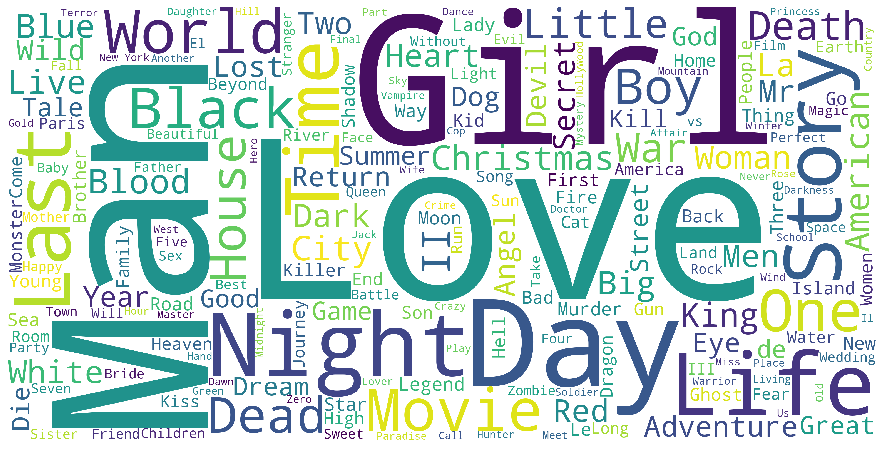

In [35]:
df2['title'] = df2['title'].astype('str')
df2['overview'] = df2['overview'].astype('str')

title_corpus = ' '.join(df2['title'])
overview_corpus = ' '.join(df2['overview'])

title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

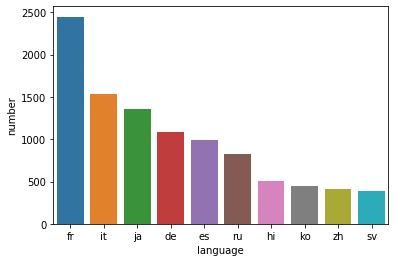

In [111]:
#Original Language
df2['original_language'].drop_duplicates().shape[0]
lang_df = pd.DataFrame(df2['original_language'].value_counts())
lang_df['language'] = lang_df.index
lang_df.columns = ['number', 'language']
lang_df.head()
sns.barplot(x='language', y='number', data=lang_df.iloc[1:11])
plt.show()

#As mentioned earlier, French and Italian are the most commonly occurring languages after English. 
#Japanese and Hindi form the majority as far as Asian Languages are concerned.

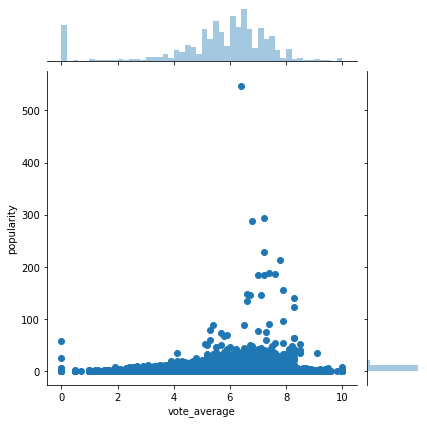

In [112]:
#Do popularity and vote average share a tangible relationship? - No
sns.jointplot(x='vote_average', y='popularity', data=df2)

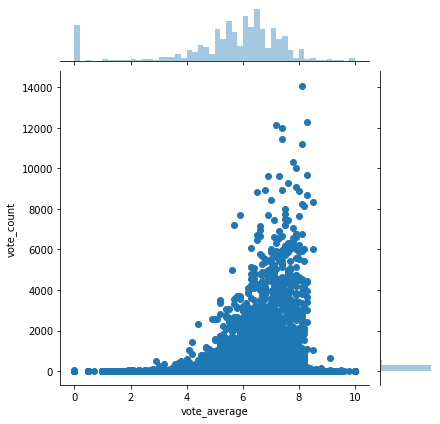

In [0]:
#There is a very small correlation between Vote Count and Vote Average
sns.jointplot(x='vote_average', y='vote_count', data=df2)

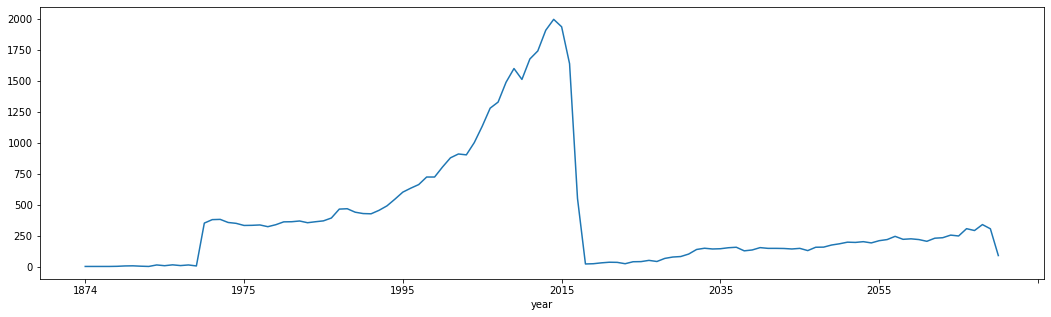

In [0]:
year_count = df2.groupby('year')['title'].count()
plt.figure(figsize=(18,5))
year_count.plot()
#We notice that there is a sharp rise in the number of movies starting the 1990s decade

In [0]:
s = df2.apply(lambda x: pd.Series(x['new_genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'
gen_md = df2.drop('new_genres', axis=1).join(s)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [0]:
pop_gen = pd.DataFrame(gen_md['genre'].value_counts()).reset_index()
pop_gen.columns = ['genre', 'movies']
pop_gen.head(10)

,genre,movies
0,Drama,20318
1,Comedy,13198
2,Thriller,7643
3,Romance,6749
4,Action,6608
5,Horror,4677
6,Crime,4318
7,Documentary,3937
8,Adventure,3506
9,Science Fiction,3055


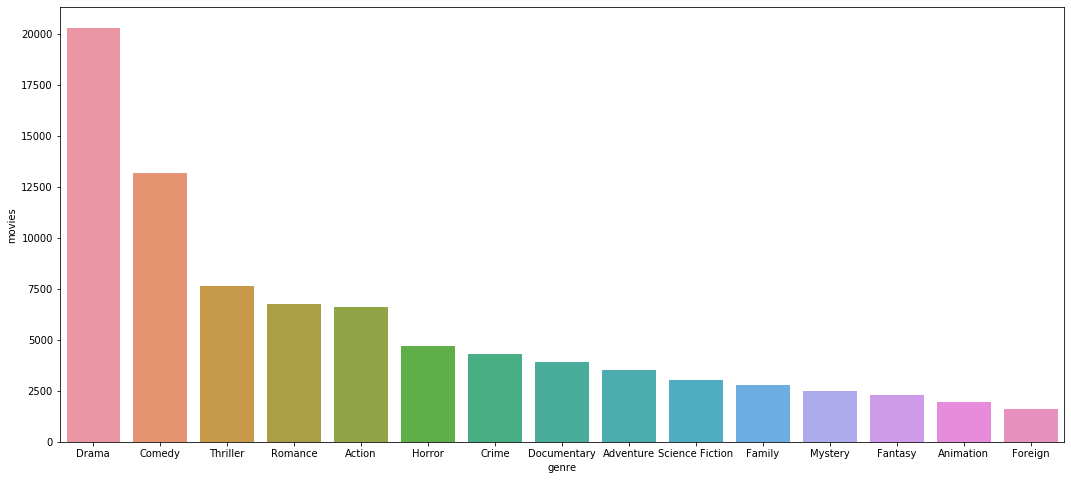

In [0]:
plt.figure(figsize=(18,8))
sns.barplot(x='genre', y='movies', data=pop_gen.head(15))
plt.show()

#Drama is the most commonly occurring genre with almost half the movies identifying itself as a drama film

In [0]:
#string to float
df2["popularity"] = df2["popularity"].astype(str).astype(float)

Text(0.5, 1.0, 'Popular Movies')

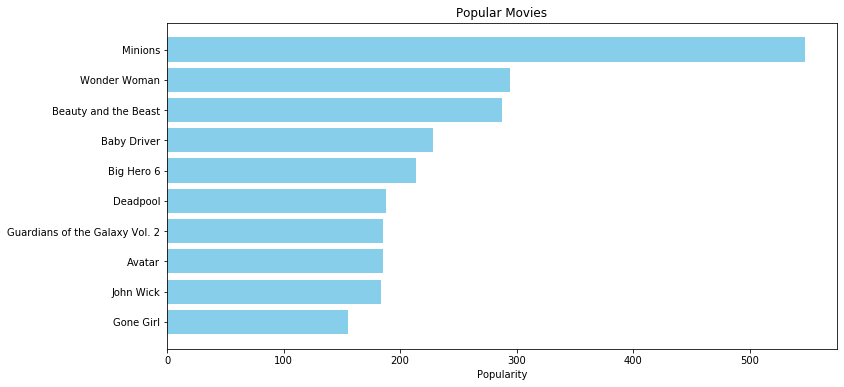

In [0]:
#popular movies visualization
pop= df2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))

plt.barh(pop['title'].head(10),pop['popularity'].head(10), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

# **Demographic RecSys** **AB**

## Popluar Moives on Basis of IMDB A

In [0]:
# imdb rating
C= df2['vote_average'].mean()
m= df2['vote_count'].quantile(0.9)

q_movies = df2.copy().loc[df2['vote_count'] >= m]

def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)
    
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)


In [0]:
#Print the top 10 movies
q_movies[['title','year','vote_count','vote_average','popularity','score']].head(10)

,title,year,vote_count,vote_average,popularity,score
314,The Shawshank Redemption,1994,8358.0,8.5,51.645403,8.445873
837,The Godfather,1972,6024.0,8.5,41.109264,8.425444
10345,Dilwale Dulhania Le Jayenge,1995,661.0,9.1,34.457024,8.421495
12525,The Dark Knight,2008,12269.0,8.3,123.167259,8.265480
2854,Fight Club,1999,9678.0,8.3,63.869599,8.256388
292,Pulp Fiction,1994,8670.0,8.3,140.950236,8.251410
522,Schindler's List,1993,4436.0,8.3,41.725123,8.206647
23743,Whiplash,2014,4376.0,8.3,64.299990,8.205412
5501,Spirited Away,2001,3968.0,8.3,41.048867,8.196063
2219,Life Is Beautiful,1997,3643.0,8.3,39.394970,8.187181


## On basis of genre- Top Genre Movies *B*

In [0]:
# function to recsys
def build_chart(genre):
    df = gen_md[gen_md['genre'] == genre]
    vote_counts = df[df['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages = df[df['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_averages.mean()
    m = vote_counts.quantile(0.9)

    q_movies = df[(df['vote_count'] >= m)][['title', 'year', 'vote_count', 'vote_average', 'popularity']]

    def weighted_rating(x, m=m, C=C):
      v = x['vote_count']
      R = x['vote_average']
      # Calculation based on the IMDB formula
      return (v/(v+m) * R) + (m/(m+v) * C)

    # Define a new feature 'score' and calculate its value with `weighted_rating()`
    q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

    #Sort movies based on score calculated above
    q_movies = q_movies.sort_values('score', ascending=False)   
    
    return q_movies

In [0]:
build_chart('Romance').head(15)

,title,year,vote_count,vote_average,popularity,score
10345,Dilwale Dulhania Le Jayenge,1995,661.0,9.1,34.457,8.350944
351,Forrest Gump,1994,8147.0,8.2,48.3072,8.143504
40345,Your Name.,2016,1030.0,8.5,34.461252,8.065803
40975,La La Land,2016,4745.0,7.9,19.681686,7.814641
22240,Her,2013,4215.0,7.9,13.8295,7.804319
7237,Eternal Sunshine of the Spotless Mind,2004,3758.0,7.9,12.9063,7.793182
1141,Cinema Paradiso,1988,834.0,8.2,14.177,7.731170
4860,Amélie,2001,3403.0,7.8,12.8794,7.687268
25054,The Theory of Everything,2014,3403.0,7.8,11.853,7.687268
882,Vertigo,2058,1162.0,8.0,18.2082,7.672054


In [0]:
build_chart('Action').head(15)

,title,year,vote_count,vote_average,popularity,score
12525,The Dark Knight,2008,12269.0,8.3,123.167,8.179853
15545,Inception,2010,14075.0,8.1,29.1081,8.001479
1163,The Empire Strikes Back,1980,5998.0,8.2,19.471,7.971276
7029,The Lord of the Rings: The Return of the King,2003,8226.0,8.1,29.3244,7.935365
256,Star Wars,1977,6778.0,8.1,42.1497,7.902565
4880,The Lord of the Rings: The Fellowship of the Ring,2001,8892.0,8.0,32.0707,7.852275
5840,The Lord of the Rings: The Two Towers,2002,7641.0,8.0,29.4235,7.829546
23823,Guardians of the Galaxy,2014,10014.0,7.9,53.2916,7.772719
2466,The Matrix,1999,9079.0,7.9,33.3663,7.760282
13662,Inglourious Basterds,2009,6598.0,7.9,16.8956,7.711377


# **Content Based RecSys (Overview & Tagline) A**

In [36]:
df2['overview'].head(5)

0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
2    A family wedding reignites the ancient feud be...
3    Cheated on, mistreated and stepped on, the wom...
4    Just when George Banks has recovered from his ...
Name: overview, dtype: object

In [37]:
df2['tagline'].head(5)

0                                                  NaN
1            Roll the dice and unleash the excitement!
2    Still Yelling. Still Fighting. Still Ready for...
3    Friends are the people who let you be yourself...
4    Just When His World Is Back To Normal... He's ...
Name: tagline, dtype: object

In [38]:
#Replace NaN with an empty string
# merging tagline & overview into description
df2['overview'] = df2['overview'].fillna('')
df2['tagline'] = df2['tagline'].fillna('')
df2['description'] = df2['overview'] + df2['tagline']
df2['description'] = df2['description'].fillna('')

In [39]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df2['description'])

In [40]:
#Output the shape of tfidf_matrix
tfidf_matrix.shape

# 777746 different words are used to describe 45555 movies

(45555, 77751)

In [41]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix (similarity measure)
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [42]:
df2 = df2.reset_index()
titles = df2['title']
indices = pd.Series(df2.index, index=df2['title'])

In [43]:
#Construct a reverse map of indices and movie titles
#indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()

In [44]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df2['title'].iloc[movie_indices]

In [45]:
get_recommendations('The Godfather')

1187               The Godfather: Part II
44122    The Godfather Trilogy: 1972-1990
23197                          Blood Ties
1922              The Godfather: Part III
32069                    Honor Thy Father
11339                    Household Saints
33560             The Most Beautiful Wife
34814                   Start Liquidation
38125            A Mother Should Be Loved
10860                            Election
Name: title, dtype: object

In [196]:
get_recommendations('Toy Story')

15413                                     Toy Story 3
3008                                      Toy Story 2
24596                                       Small Fry
10337                          The 40 Year Old Virgin
23913                     Andy Hardy's Blonde Trouble
3068                                  Man on the Moon
29300                                      Hot Splash
43519                Andy Kaufman Plays Carnegie Hall
38571    Superstar: The Life and Times of Andy Warhol
6464                           What's Up, Tiger Lily?
Name: title, dtype: object

In [0]:
get_recommendations('GoldenEye')

# **Content Based RecSys (Credits Genres) (Reset the RAM) AB**

In [113]:
keywords = pd.read_csv('keywords.csv')

In [114]:
keywords['id'] = keywords['id'].astype('int')
#credits['id'] = credits['id'].astype('int')
df2['id'] = df2['id'].astype('int')

In [115]:
df2.shape

(45555, 28)

In [116]:
df2 = df2.merge(keywords, on='id')

In [117]:
# extracting from cast, crew & genres
from ast import literal_eval

features = ["cast", "crew", "genres"]
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

In [118]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [119]:
# Returns the list top 3 elements or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [120]:
# Define new director, cast, genres and keywords features that are in a suitable form.
df2['director'] = df2['crew'].apply(get_director)

features = ['cast', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(get_list)

In [121]:
# Print the new features of the first 3 films
df2[['title', 'cast', 'director', 'genres']].head(3)

,title,cast,director,genres
0,Toy Story,"[Tom Hanks, Tim Allen, Don Rickles]",John Lasseter,"[Animation, Comedy, Family]"
1,Jumanji,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",Joe Johnston,"[Adventure, Fantasy, Family]"
2,Grumpier Old Men,"[Walter Matthau, Jack Lemmon, Ann-Margret]",Howard Deutch,"[Romance, Comedy]"


In [122]:
# Function to convert all strings to lower case and strip names of spaces
# This is done so that our vectorizer doesn't count the Johnny of "Johnny Depp" and "Johnny Galecki" as the same.
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [123]:
# Apply clean_data function to your features.
features = ['cast', 'director', 'genres']

for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

In [124]:
# all the metadata that we want to feed to our vectorizer (namely actors, director and keywords).
def create_soup(x):
    return ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df2['soup'] = df2.apply(create_soup, axis=1)

In [125]:
# Import CountVectorizer and create the count matrix
# Instead of TF-IDF using CV as we do not want to down-weight the presence of an actor/director if he or she has acted or directed in relatively more movies. 
# It doesn't make much intuitive sense.
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])

In [126]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [127]:
# Reset index of our main DataFrame and construct reverse mapping as before
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['title'])

In [128]:
def get_recommendations(title, cosine_sim2=cosine_sim2):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim2[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df2['title'].iloc[movie_indices]

In [129]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

10210           Batman Begins
12589         The Dark Knight
28541            The Outsider
31700                Baseline
45132    The State Counsellor
516         Romeo Is Bleeding
9311                   Shiner
11463            The Prestige
20622               Rainy Dog
25530                    Tell
Name: title, dtype: object

## New Improved  *B*

In [0]:
# New improved systwm on basis of above

#from ast import literal_eval

def improved_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim2[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:26]
    movie_indices = [i[0] for i in sim_scores]
    
    movies = df2.iloc[movie_indices][['title', 'vote_count', 'vote_average', 'year']]
    vote_counts = movies[movies['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages = movies[movies['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_averages.mean()
    m = vote_counts.quantile(0.60)

    def weighted_rating(x, m=m, C=C):
      v = x['vote_count']
      R = x['vote_average']
      # Calculation based on the IMDB formula
      return (v/(v+m) * R) + (m/(m+v) * C)

    qualified = movies[(movies['vote_count'] >= m) ]

    qualified['score'] = qualified.apply(weighted_rating, axis=1)
    qualified = qualified.sort_values('score', ascending=False).head(10)
    return qualified

In [0]:
improved_recommendations('The Dark Knight Rises')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,title,vote_count,vote_average,year,score
6981,The Dark Knight,12269.0,8.3,2008,8.247663
263,Leon: The Professional,4293.0,8.2,1994,8.063379
6623,The Prestige,4510.0,8.0,2006,7.882085
5,Heat,1886.0,7.7,1995,7.482044
6218,Batman Begins,7511.0,7.5,2005,7.446692
380,Carlito's Way,805.0,7.7,1993,7.269169
2085,Following,363.0,7.2,1998,6.709711
1278,Cop Land,384.0,6.6,1997,6.388766
2515,Backdraft,360.0,6.4,1991,6.272312
1437,Mercury Rising,374.0,6.0,1998,6.053590


# **Collaborative Filtering User Based (Rating) A**

In [0]:
# install package
!pip install surprise

     |████████████████████████████████| 6.5MB 3.0MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.0-cp36-cp36m-linux_x86_64.whl size=1673656 sha256=5233a2d9f9e3ab565480ddbcb68354a268ed2d7633df205f149c856fc8ce111b
  Stored in directory: /root/.cache/pip/wheels/cc/fa/8c/16c93fccce688ae1bde7d979ff102f7bee980d9cfeb8641bcf
Successfully built scikit-surprise


In [46]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
reader = Reader()
ratings = pd.read_csv('ratings_small.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [47]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [48]:
svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9058  0.8972  0.8954  0.8959  0.8949  0.8978  0.0040  
MAE (testset)     0.6970  0.6925  0.6869  0.6898  0.6881  0.6909  0.0036  
Fit time          5.39    5.12    5.64    5.33    4.85    5.27    0.27    
Test time         0.16    0.14    0.29    0.16    0.14    0.18    0.06    


{'test_rmse': array([0.90577949, 0.89716889, 0.89539655, 0.89588212, 0.89491001]),
 'test_mae': array([0.69700276, 0.69245312, 0.68689706, 0.68984806, 0.68810006]),
 'fit_time': (5.392709970474243,
  5.116985082626343,
  5.644809007644653,
  5.334601879119873,
  4.853092193603516),
 'test_time': (0.15786528587341309,
  0.140671968460083,
  0.29040002822875977,
  0.15602397918701172,
  0.14443278312683105)}

In [49]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [50]:
ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [51]:
svd.predict(1, 302, 3)

Prediction(uid=1, iid=302, r_ui=3, est=2.7458100481683134, details={'was_impossible': False})

# **Hybrid**

In [52]:
df2.shape

(45555, 30)

In [53]:
links_small = pd.read_csv('links.csv')
links_small = links_small[links_small['tmdbId'].notnull()]['tmdbId'].astype('int')

In [54]:
df2 = df2.drop([19730, 29503, 35587])

In [55]:
#Check EDA Notebook for how and why I got these indices.
df2['id'] = df2['id'].astype('int')

In [56]:
smd = df2[df2['id'].isin(links_small)]
smd.shape

(45552, 30)

In [152]:
smd.head(5)

,index,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,video,vote_average,vote_count,cast,crew,year,new_genres,keywords,director,soup
0,0,FALSE,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[animation, comedy, family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,...,False,7.7,5415.0,"[tomhanks, timallen, donrickles]","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",1995,"[Animation, Comedy, Family]","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",johnlasseter,tomhanks timallen donrickles johnlasseter anim...
1,1,FALSE,NaN,65000000,"[adventure, fantasy, family]",NaN,8844,tt0113497,en,Jumanji,...,False,6.9,2413.0,"[robinwilliams, jonathanhyde, kirstendunst]","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",1995,"[Adventure, Fantasy, Family]","[{'id': 10090, 'name': 'board game'}, {'id': 1...",joejohnston,robinwilliams jonathanhyde kirstendunst joejoh...
2,2,FALSE,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[romance, comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,...,False,6.5,92.0,"[waltermatthau, jacklemmon, ann-margret]","[{'credit_id': '52fe466a9251416c75077a89', 'de...",1995,"[Romance, Comedy]","[{'id': 1495, 'name': 'fishing'}, {'id': 12392...",howarddeutch,waltermatthau jacklemmon ann-margret howarddeu...
3,3,FALSE,NaN,16000000,"[comedy, drama, romance]",NaN,31357,tt0114885,en,Waiting to Exhale,...,False,6.1,34.0,"[whitneyhouston, angelabassett, lorettadevine]","[{'credit_id': '52fe44779251416c91011acb', 'de...",1995,"[Comedy, Drama, Romance]","[{'id': 818, 'name': 'based on novel'}, {'id':...",forestwhitaker,whitneyhouston angelabassett lorettadevine for...
4,4,FALSE,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,...,False,5.7,173.0,"[stevemartin, dianekeaton, martinshort]","[{'credit_id': '52fe44959251416c75039ed7', 'de...",1995,[Comedy],"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...",charlesshyer,stevemartin dianekeaton martinshort charlesshy...


In [57]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

In [58]:
id_map = pd.read_csv('links.csv')[['movieId', 'tmdbId']]
id_map['tmdbId'] = id_map['tmdbId'].apply(convert_int)
id_map.columns = ['movieId', 'id']
id_map = id_map.merge(df2[['title', 'id']], on='id').set_index('title')
#id_map = id_map.set_index('tmdbId')

In [59]:
indices_map = id_map.set_index('id')

In [60]:
def hybrid(userId, title):
    idx = indices[title]
    tmdbId = id_map.loc[title]['id']
    #print(idx)
    movie_id = id_map.loc[title]['movieId']
    
    sim_scores = list(enumerate(cosine_sim[int(idx)]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:26]
    movie_indices = [i[0] for i in sim_scores]
    
    movies = smd.iloc[movie_indices][['title', 'vote_count', 'vote_average', 'year', 'id']]
    movies['est'] = movies['id'].apply(lambda x: svd.predict(userId, indices_map.loc[x]['movieId']).est)
    movies = movies.sort_values('est', ascending=False)
    return movies.head(10)

In [61]:
df2.shape

(45552, 30)

In [62]:
hybrid(1, 'Avatar')

,title,vote_count,vote_average,year,id,est
2466,The Matrix,9079.0,7.9,1999,603,3.087891
3546,Pandora and the Flying Dutchman,19.0,6.5,2051,38688,2.966712
2286,A Simple Plan,191.0,6.9,1998,10223,2.894891
30091,Success At Any Price,0.0,0.0,2034,105869,2.677548
35765,La Rabbia Di Pasolini,0.0,0.0,2008,15994,2.677548
38359,Veeram,11.0,5.8,2014,188540,2.677548
28745,Saints and Soldiers: The Void,22.0,5.2,2014,139334,2.677548
6740,Mobsters,34.0,5.7,1991,21219,2.677548
16135,Bloodbrothers,4.0,6.1,1978,114096,2.677548
33050,Beyond Darkness,3.0,6.0,1990,288154,2.677548


In [214]:
new = hybrid(1,'Avatar')

In [218]:
new1 = new.drop(['vote_count','vote_average','year'],axis=1)

In [219]:
new1

,title,id,est
2466,The Matrix,603,3.397387
2286,A Simple Plan,10223,2.874042
3546,Pandora and the Flying Dutchman,38688,2.780385
30091,Success At Any Price,105869,2.665071
35765,La Rabbia Di Pasolini,15994,2.665071
38359,Veeram,188540,2.665071
28745,Saints and Soldiers: The Void,139334,2.665071
6740,Mobsters,21219,2.665071
16135,Bloodbrothers,114096,2.665071
33050,Beyond Darkness,288154,2.665071


In [220]:
reader = Reader()

In [221]:
data = Dataset.load_from_df(new1[['id', 'title','est']], reader)

In [222]:
svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.1191  0.3468  0.3231  0.0026  0.0026  0.1588  0.1502  
MAE (testset)     0.0836  0.1856  0.2744  0.0026  0.0026  0.1098  0.1063  
Fit time          0.00    0.00    0.00    0.00    0.00    0.00    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    


{'test_rmse': array([0.11908354, 0.34679583, 0.32307919, 0.00255888, 0.00255888]),
 'test_mae': array([0.08363039, 0.18563791, 0.27438606, 0.00255888, 0.00255888]),
 'fit_time': (0.0018889904022216797,
  0.003161191940307617,
  0.002089977264404297,
  0.002849102020263672,
  0.0015680789947509766),
 'test_time': (0.00010609626770019531,
  0.00015401840209960938,
  8.96453857421875e-05,
  0.0002579689025878906,
  7.82012939453125e-05)}